In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit as cf
from scipy.stats import chi2
from scipy.signal import find_peaks as pk
from math import floor
from sklearn import preprocessing

In [2]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 20
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [3]:
def chi2_red(y,y_err,x,func,popt):
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    y_ajuste = func(x,*popt)
    
    chi_cuadrado = np.sum(((y-y_ajuste)/y_err)**2)
    chi_reducido = chi_cuadrado/grados_lib
    return chi_reducido

def r2(y,x,lineal,pars):
    r2 = 1 - (np.sum((y-lineal(x,*pars))**2)/np.sum((y - np.mean(y))**2))
    return r2

dcmls = lambda x : -int(floor(np.log10(abs(x))))

In [4]:
def leermd(filename):
    result = []
    from pandas import read_csv
    df = read_csv(filename, sep='\t', skiprows=3, decimal=',')
    nparray = df.values
    nparray = nparray[~np.isnan(nparray).any(axis=1)]
    for cols in range(nparray.shape[1]):
        out = nparray[:,cols]
        result.append(out)
    return result

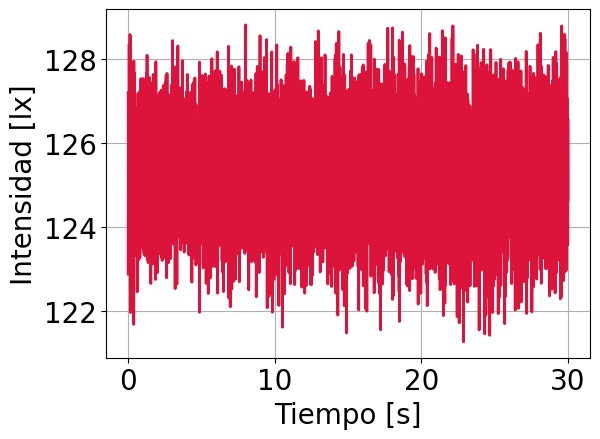

In [5]:
t,i_t = leermd('clase1/test data.txt')

plt.plot(t,i_t,'crimson')
plt.xlabel('Tiempo [s]')
plt.ylabel('Intensidad [lx]')
plt.grid()

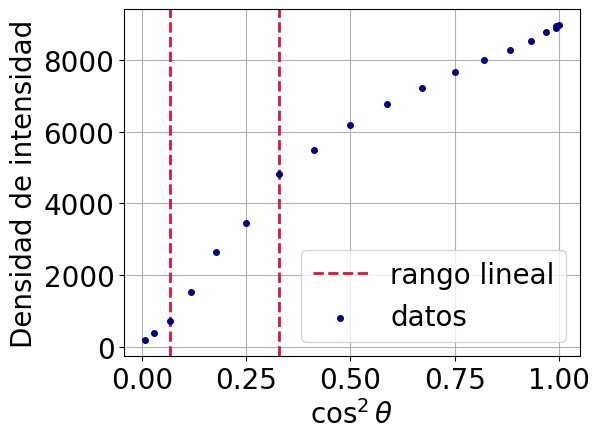

In [6]:
ang_m,err_ang_m,i_m = np.loadtxt('clase1/Archivo trivial malus.csv',delimiter=',',unpack=True,skiprows=1)

cos_m = np.cos(np.radians(ang_m[2:]+90))**2

plt.axvline(x=cos_m[2],ls='--',c='crimson',label='rango lineal',zorder=1)
plt.axvline(x=cos_m[6],ls='--',c='crimson',zorder=1)
plt.scatter(cos_m,i_m[2:],c='navy',label='datos',zorder=2)
plt.xlabel(r'$\cos^{2}{\theta}$')
plt.ylabel('Densidad de intensidad')
plt.grid()
plt.legend()
plt.savefig('plots/malus.png')

451.2349854 570.4232178


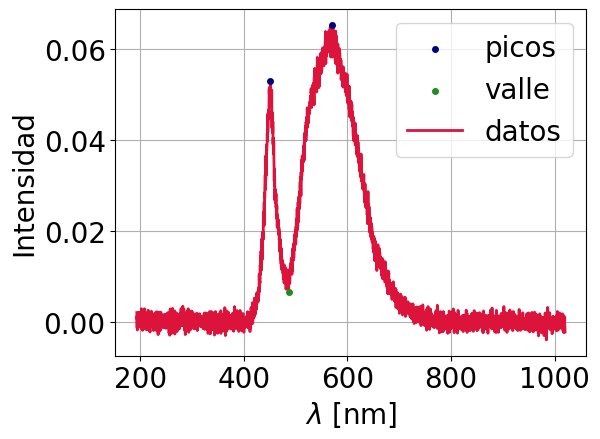

In [7]:
lambda_e,i_e = np.loadtxt('clase1/espectro_led.csv',delimiter=';',unpack=True,skiprows=48)
#i_e = preprocessing.normalize([i_e])[0]

picos_espectro = pk(i_e,height=0.018,distance=500)[0]
pico1,pico2 = lambda_e[picos_espectro]
print(pico1,pico2)

valle_e_idx = pk(-i_e,height=-0.01,distance=550)[0][2]
valle_e = lambda_e[valle_e_idx]

lambdas_fit = [pico1,valle_e,pico2]

plt.scatter(lambda_e[picos_espectro],i_e[picos_espectro],c='navy',label='picos',zorder=2)
plt.scatter(lambda_e[valle_e_idx],i_e[valle_e_idx],c='forestgreen',label='valle',zorder=2)
plt.plot(lambda_e,i_e,'crimson',label='datos',zorder=1)
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel('Intensidad')
plt.grid()
plt.legend()
plt.savefig('plots/espectro_thor.png')

67.0 246.0


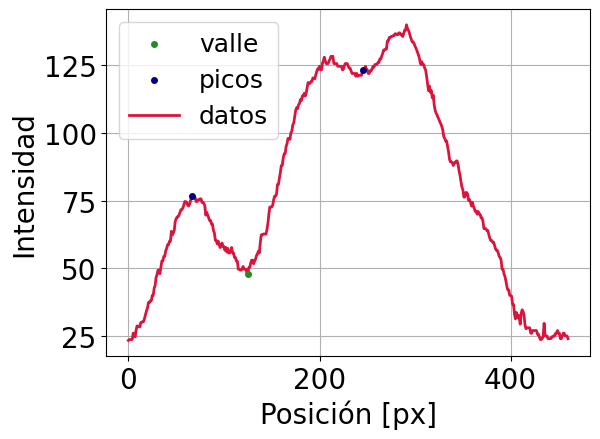

In [17]:
pixels_c,i_c = np.loadtxt('clase2/espectros 2/calibración.csv',delimiter=',',unpack=True,skiprows=1)

picos_c = pk(i_c,height=0.039,distance=200)[0]
picos_c[1] -= 45
pico1_c,pico2_c = pixels_c[picos_c]
print(pico1_c,pico2_c)

valle_c_idx = pk(-i_c,height=-50,distance=100)[0][1]
valle_c = pixels_c[valle_c_idx]

pixels_fit = [pico1_c,valle_c,pico2_c]

lineal = lambda x,a,b : a*x+b

pars,cov = cf(lineal,pixels_fit,lambdas_fit)
a_fit,b_fit = pars

pixels_to_lambda = lambda x : lineal(x,a_fit,b_fit)

plt.scatter(pixels_c[valle_c_idx],i_c[valle_c_idx],c='forestgreen',label='valle',zorder=2)
plt.scatter(pixels_c[picos_c],i_c[picos_c],c='navy',label='picos',zorder=2)
plt.plot(pixels_c,i_c,'crimson',label='datos',zorder=1)
plt.xlabel('Posición [px]')
plt.ylabel('Intensidad')
plt.grid()
plt.legend(fontsize=18)
plt.savefig('plots/espectro_imagej.png')

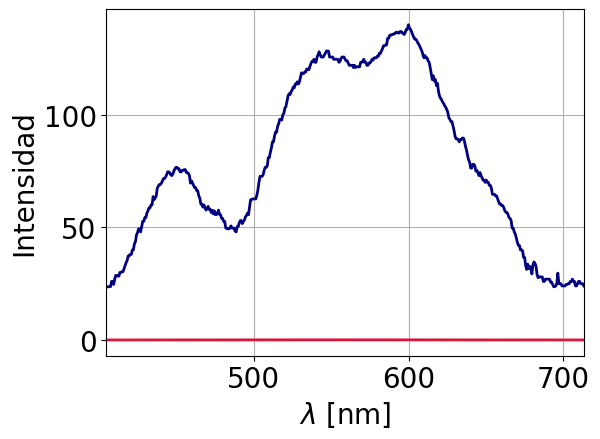

In [18]:
plt.plot(lambda_e,i_e,'crimson',zorder=1)
plt.plot(pixels_to_lambda(pixels_c),i_c,'navy',zorder=1)
plt.xlim(pixels_to_lambda(pixels_c)[0],pixels_to_lambda(pixels_c)[-1])
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel('Intensidad')
plt.grid()

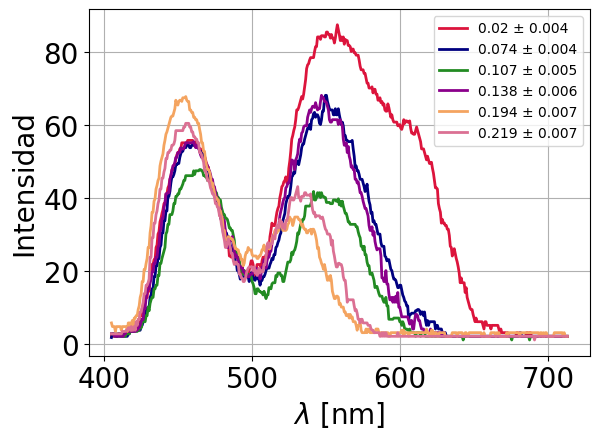

In [19]:
azules_list = [2,4,5,6,8,9]
c_list = ['crimson','navy','forestgreen','darkmagenta','sandybrown','palevioletred']
lambdas = pixels_to_lambda(pixels_c)
i_azules = []
for i in range(len(azules_list)):
    pixels_a,i_a = np.loadtxt(f'clase2/espectros 2/azul {azules_list[i]}.csv',delimiter=',',unpack=True,skiprows=1)
    i_azules.append(i_a)
    plt.plot(pixels_to_lambda(pixels_a),i_a,c_list[i],label=f'{np.round(conc_a[i],3)} ± {np.round(err_conc_a[i],3)}',zorder=1)
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel('Intensidad')
plt.legend(fontsize=10)
plt.grid()
plt.savefig(f'plots/azules.png')

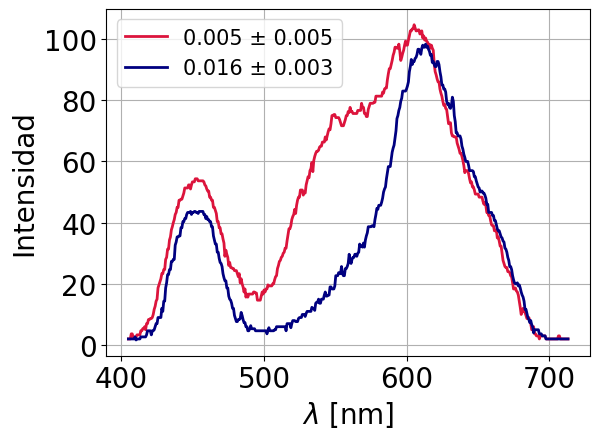

In [20]:
red_list = [11,2]
i_rojos = []
for i in range(len(red_list)):
    pixels_r,i_r = np.loadtxt(f'clase2/espectros 2/rojo {red_list[i]}.csv',delimiter=',',unpack=True,skiprows=1)
    i_rojos.append(i_r)
    plt.plot(pixels_to_lambda(pixels_r),i_r,c_list[i],label=f'{np.round(conc_r[i],3)} ± {np.round(err_conc_r[i],3)}',zorder=1)
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel('Intensidad')
plt.legend(fontsize=15)
plt.grid()
plt.savefig(f'plots/rojos.png')

In [21]:
err_agua = 0.1 # ml
err_sol = 0.01
l = 1
err_l = 0.1
agua_a = np.array([2.5,2.5,2.5,2.5,2.5,2.5])
sol_a = np.array([0.05,0.2,0.3,0.4,0.6,0.7])
conc_a = sol_a/(sol_a+agua_a)
err_conc_a = np.sqrt(((1/(sol_a+agua_a)-sol_a/(sol_a+agua_a)**2)*err_sol)**2+(sol_a*err_agua/(sol_a+agua_a)**2)**2)

agua_r = np.array([2,3])
sol_r = np.array([0.01,0.05])
conc_r = sol_r/(sol_r+agua_r)
err_conc_r = np.sqrt(((1/(sol_r+agua_r)-sol_r/(sol_r+agua_r)**2)*err_sol)**2+(sol_r*err_agua/(sol_r+agua_r)**2)**2)

In [31]:
for i  in range(len(conc_r)):
    print(np.round(conc_r[i],dcmls(err_conc_r[i])),np.round(err_conc_r[i],dcmls(err_conc_r[i])))

0.005 0.005
0.016 0.003


In [23]:
np.array([1,2])/np.array([2,8])

array([0.5 , 0.25])

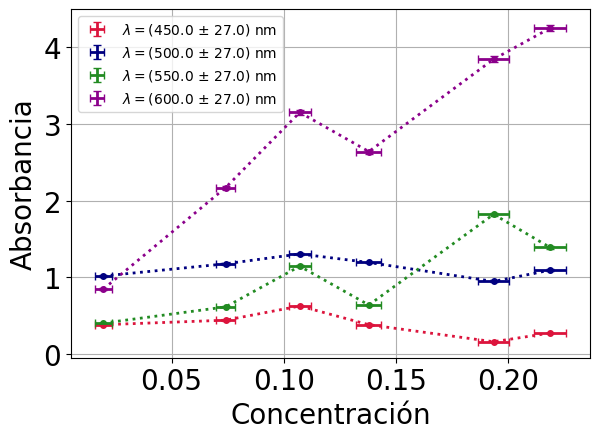

In [24]:
lambdas_list = [lambdas[67],lambdas[142],lambdas[216],lambdas[291]]
listonga = [67,142,216,291]

A_a = []
for i in range(len(i_azules)):
    A_a.append(-np.log(np.array(i_azules[i])/np.array(i_c)))
plot = []

err_A_a = abs(np.array(A_a))/100


for k in range(len(lambdas_list)):
    plot_k = []
    err_plot_k = []
    for i in range(len(azules_list)):
        plot_k.append(A_a[i][listonga[k]])
        err_plot_k.append(err_A_a[i][listonga[k]])
    plot.append(plot_k)
    plt.errorbar(conc_a,plot[k],yerr=err_plot_k,xerr=err_conc_a,fmt='None',ecolor=c_list[k],label=f'$\lambda = $({np.round(lambdas_list[k],0)} ± {np.round(res,0)}) nm')
    plt.scatter(conc_a,plot[k],c=c_list[k])
    plt.plot(conc_a,plot[k],':',c=c_list[k])
plt.xlabel('Concentración')
plt.ylabel('Absorbancia')
plt.grid()
plt.legend(fontsize=10)
plt.savefig('plots/absorbancia.png')
#pars_k4,cov_k4 = cf(lineal,conc_a,plot[3],p0=[15,0.8])
#a_k4,b_k4 = pars_k4
#x_adj_k = np.linspace(min(conc_a),max(conc_a),100)
#y_adj_k4 = lineal(x_adj_k,a_k4,b_k4)
#plt.plot(x_adj_k,y_adj_k4,'crimson',label='ajuste',zorder=1)
#plt.scatter(conc_a,plot[k],c='navy',label='datos',zorder=2)
#plt.xlabel('Concentración')
#plt.ylabel('Absorbancia')
#plt.grid()
#plt.legend()
#plt.savefig(f'plots/jugos/a_{k}.png')
#plt.show()

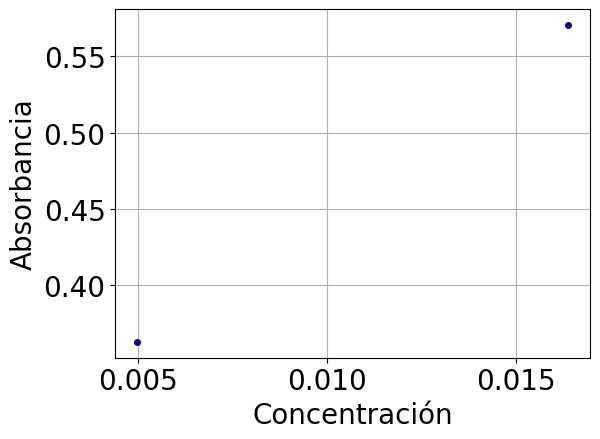

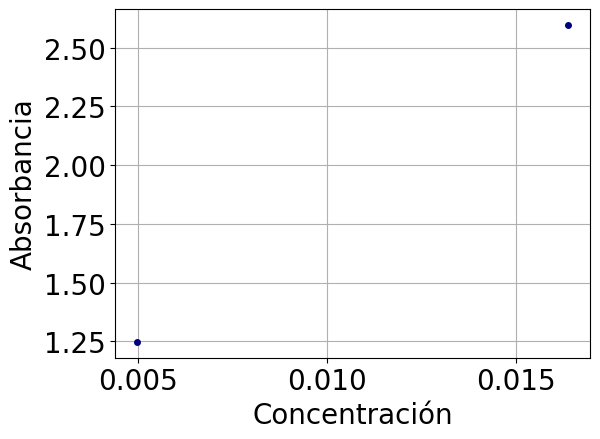

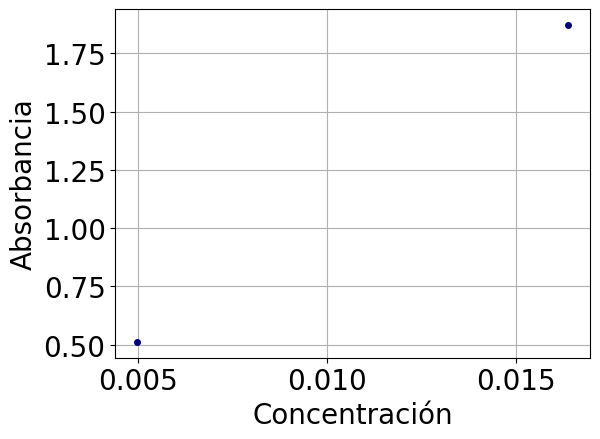

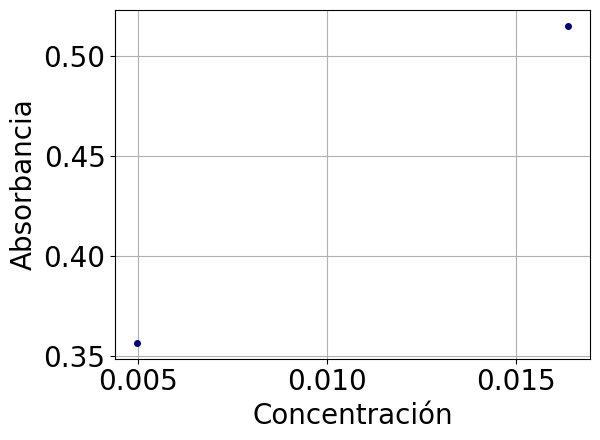

In [25]:
A_r = []
for i in range(len(i_rojos)):
    A_r.append(-np.log(np.array(i_rojos[i])/np.array(i_c)))
plot = []

for k in range(len(lambdas_list)):
    plot_k = []
    for i in range(len(red_list)):
        plot_k.append(A_r[i][listonga[k]])
    plot.append(plot_k)
    plt.scatter(conc_r,plot[k],c='navy')
    plt.xlabel('Concentración')
    plt.ylabel('Absorbancia')
    plt.grid()
    plt.savefig(f'plots/jugos/r_{k}.png')
    plt.show()

#pars_k4,cov_k4 = cf(lineal,conc_a,plot[3],p0=[15,0.8])
#a_k4,b_k4 = pars_k4
#x_adj_k = np.linspace(min(conc_a),max(conc_a),100)
#y_adj_k4 = lineal(x_adj_k,a_k4,b_k4)
#plt.plot(x_adj_k,y_adj_k4,'crimson',label='ajuste',zorder=1)
#plt.scatter(conc_a,plot[k],c='navy',label='datos',zorder=2)
#plt.xlabel('Concentración')
#plt.ylabel('Absorbancia')
#plt.grid()
#plt.legend()
#plt.savefig(f'plots/jugos/r_{k}.png')
#plt.show()

In [26]:
# tiempo de exposición
t_exp = 2.047 # ms

# resolución
ancho_banda = 370 # nm
n_pixels = 460
DP = ancho_banda/n_pixels
PSP = 33 # pixels
res = DP*PSP
res

26.543478260869566